### Data-driven optimization and decision making

### Final project

Juha Reinikainen

In [89]:
import numpy as np
import model
import data
import algorithm
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

import warnings
warnings.simplefilter("ignore")

# reload changes to self written files
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
df = data.get_data_df()

n_stocks = df.shape[1]
population_size = 100
n_generations = 1000

#start with equal weight for each stock 1/50 = 0.02
wi = 1 / n_stocks
w0 = np.full(n_stocks, wi)

problem = model.PortfolioSelection(df, w0, 0.01, 0.8, 4, 20)
# problemArima = model.PortfolioSelectionArima(df, w0)

repairMethod = algorithm.OneSumRepair()

In [91]:
initial_population = algorithm.createWeightVectors(population_size, n_stocks)

nsga2 = NSGA2(pop_size = population_size, sampling=initial_population, repair = repairMethod)
res = minimize(problem, nsga2, ("n_gen", n_generations), seed=1, verbose = True)



n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  1.00000E+01 |  1.73200E+01 |       1 |            - |            -
    2 |     200 |  1.00000E+01 |  1.44100E+01 |       1 |  0.00000E+00 |            f
    3 |     300 |  1.00000E+01 |  1.31100E+01 |       1 |  0.00000E+00 |            f
    4 |     400 |  9.000000000 |  1.23200E+01 |       1 |  0.000686429 |            f
    5 |     500 |  9.000000000 |  1.15700E+01 |       1 |  0.00000E+00 |            f
    6 |     600 |  8.000000000 |  1.09800E+01 |       1 |  0.000957391 |            f
    7 |     700 |  7.000000000 |  1.01800E+01 |       1 |  0.000263724 |            f
    8 |     800 |  4.000000000 |  9.700000000 |       1 |  0.000267108 |            f
    9 |     900 |  4.000000000 |  8.830000000 |       1 |  0.00000E+00 |            f
   10 |    1000 |  3.000000000 |  7.760000000 |       1 |  0.000054395 |            f
   11 |    1100 |  0.00000E+00 |  6.660000000 |       

In [92]:
# initial_population = algorithm.createWeightVectors(population_size, n_stocks)

# nsga2 = NSGA2(pop_size = population_size, sampling=initial_population, repair = repairMethod)
# resArima = minimize(problemArima, nsga2, ("n_gen", n_generations), seed=1, verbose = False)


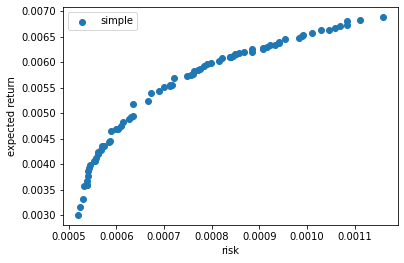

In [93]:
plt.scatter(res.F[:,1], -res.F[:,0], label="simple")
# plt.scatter(resArima.F[:,1], -resArima.F[:,0], label="arima")
plt.xlabel("risk")
plt.ylabel("expected return")
plt.legend()
plt.show()